In [1]:
%matplotlib inline
import hscAna as hA
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table
from toolbox.astro import angsep
from hscAna.utils import get_hsc_regions, skybox
from toolbox.utils import read_pickled_data
group_regions_old = read_pickled_data('/home/jgreco/data/tracts_and_patches.pkl')
group_info = Table.read('/home/jgreco/data/groups/group_info.csv')

In [2]:
band = 'I'
group_id = 1925
box_width = 3.0 # Mpc
idx = np.argwhere(group_info['group_id']==group_id)[0,0]
ra_c, dec_c, D_A, D_L = group_info['ra', 'dec', 'D_A', 'D_L'][idx]
theta = (box_width/D_A)*180.0/np.pi
group_regions = get_hsc_regions(skybox(ra_c, dec_c, theta, theta))
print 'will extract region of angular size', round(theta, 3), 'degree'

will extract region of angular size 0.424 degree


In [3]:
candy = []

for tract, patch in group_regions:
    mycat = hA.MyCat(tract, patch, band, group_id, makecuts=True)
    if mycat.count()>0:
        candy.append(mycat)
        
# get coordinates of all candidates
coords = []
for i in range(len(candy)):
    for ra, dec in candy[i].coord():
        coords.append((ra, dec))
coords = np.array(coords)
        
# build mask for double entries
mask = np.ones(coords.shape[0], dtype=bool)
for i, (ra, dec) in enumerate(coords):
    if mask[i]==True:
        unique = angsep(ra, dec, coords[:,0], coords[:,1]) > 2
        unique[i] = True
        mask &= unique

coords = coords[mask]
        
print 'number of candidates =', coords.shape[0]
np.savetxt('../output/group_'+str(group_id)+'_coords.csv', coords, delimiter=',', header='ra,dec')

number of candidates = 182


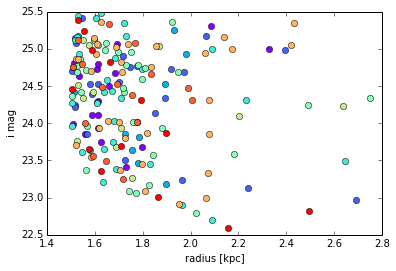

In [4]:
f1, a1 = plt.subplots(1,1)
colors = plt.cm.rainbow(np.linspace(0,1,len(candy)))
for i in range(len(candy)):
    a1.plot(candy[i].size, candy[i].mag, 'o', c=colors[i])
a1.set_xlabel('radius [kpc]')
a1.set_ylabel(band.lower()+' mag');

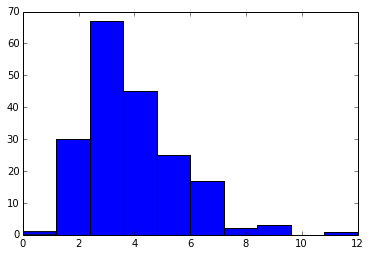

In [5]:
nchild = []; 
for i in range(len(candy)):
    nchild.extend(candy[i].cat.get('deblend.nchild'))
plt.hist(nchild);